# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
SP500_Sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
Mixed_Asset_Classes = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
FANG_Stocks = ['FB', 'AMZN', 'NFLX', 'GOOG']
Stocks_Bonds_Gold = ['SPY', 'QQQ', 'TLT', 'GLD']

# Pick one of the above
symbols = Stocks_Bonds_Gold

capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 3.0,
    'period' : 7,
    'use_regime_filter' : True,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

STOP LOSS!!!
STOP LOSS!!!


View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,93.60,93,entry,LONG,TLT
0,2005-09-14,1,39.18,195,entry,LONG,QQQ
0,2005-09-14,2,123.21,63,entry,LONG,SPY
1,2005-09-29,3,39.20,195,exit,LONG,QQQ
1,2005-09-29,4,122.66,63,exit,LONG,SPY


In [7]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
185,2023-10-18,363.37,2023-11-02,363.44,0.07,18.13,259,112384.34,LONG,QQQ
176,2023-10-18,430.21,2023-11-02,430.76,0.55,150.71,274,112535.05,LONG,SPY
150,2023-11-06,183.35,2023-11-16,183.69,0.34,206.04,606,112741.09,LONG,GLD
186,2023-12-04,386.32,2023-12-07,390.43,4.11,1002.84,244,113743.92,LONG,QQQ
151,2023-12-08,185.64,2023-12-14,188.73,3.09,1362.69,441,115106.61,LONG,GLD


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-12-14,125106.61,125106.61,125106.61,0,125106.61,1.00,X
2023-12-15,125106.61,125106.61,125106.61,0,125106.61,1.00,-
2023-12-18,125106.61,125106.61,125106.61,0,125106.61,1.00,-
2023-12-19,125106.61,125106.61,125106.61,0,125106.61,1.00,-
2023-12-20,125106.61,125106.61,125106.61,0,125106.61,1.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2005-09-02
end                                                     2023-12-20
beginning_balance                                            10000
ending_balance                                           125106.61
total_net_profit                                         115106.61
gross_profit                                             274096.85
gross_loss                                              -158990.23
profit_factor                                                 1.72
return_on_initial_capital                                  1151.07
annual_return_rate                                           14.81
trading_period                           18 years 3 months 18 days
pct_time_in_market                                           65.02
margin                                                        3.00
avg_leverage                                                  1.27
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
TLT,"$26,195.43",0.25,0.23,0.91
QQQ,"$44,013.99",0.25,0.38,1.53
SPY,"$33,515.65",0.25,0.29,1.16
GLD,"$11,381.54",0.25,0.10,0.40
TOTAL,"$115,106.61",1.00,1.00,1.00


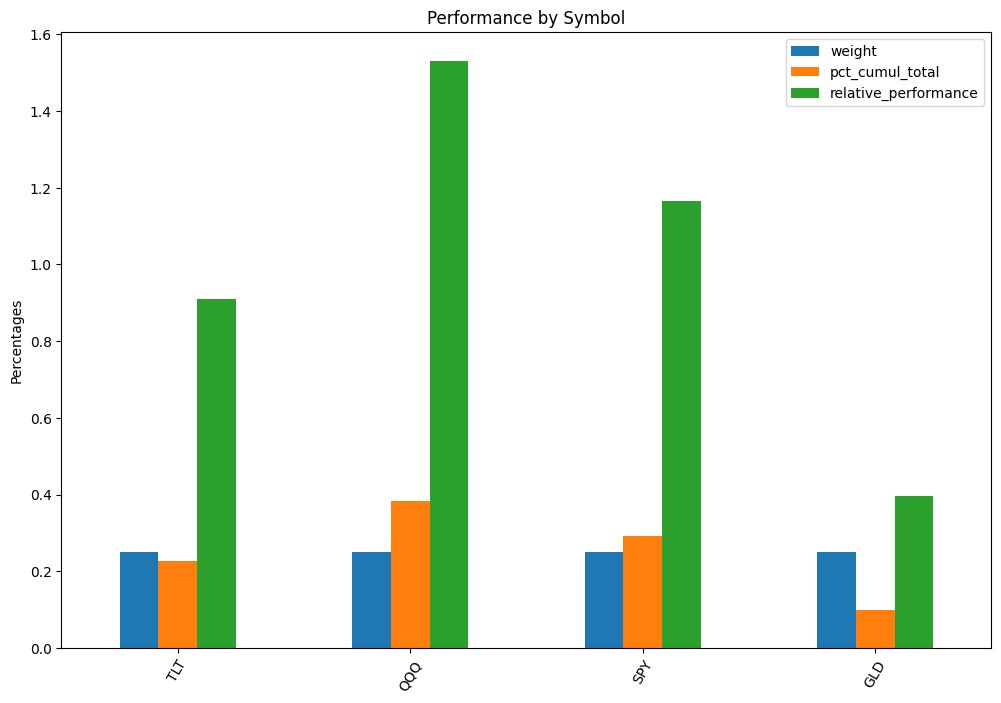

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,TLT,QQQ,SPY,GLD
TLT,1.00,-0.29,-0.34,0.16
QQQ,-0.29,1.00,0.92,0.04
SPY,-0.34,0.92,1.00,0.05
GLD,0.16,0.04,0.05,1.00


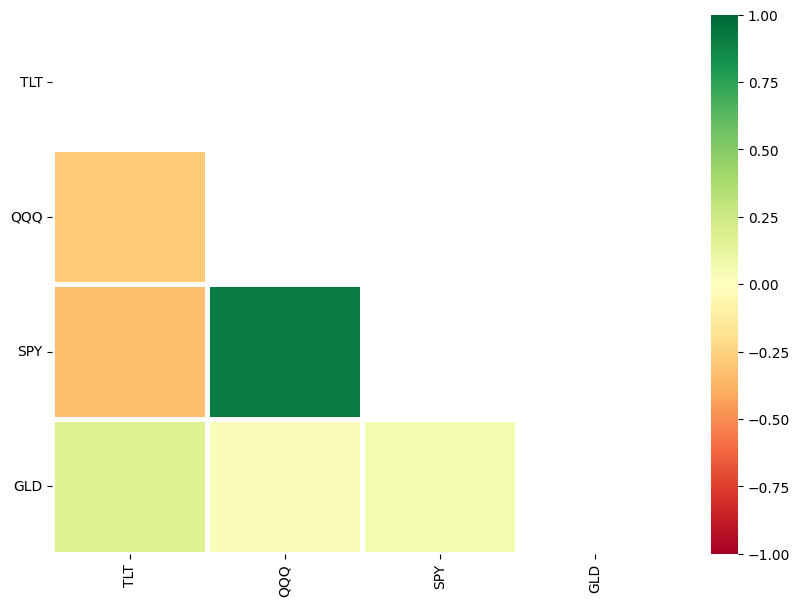

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

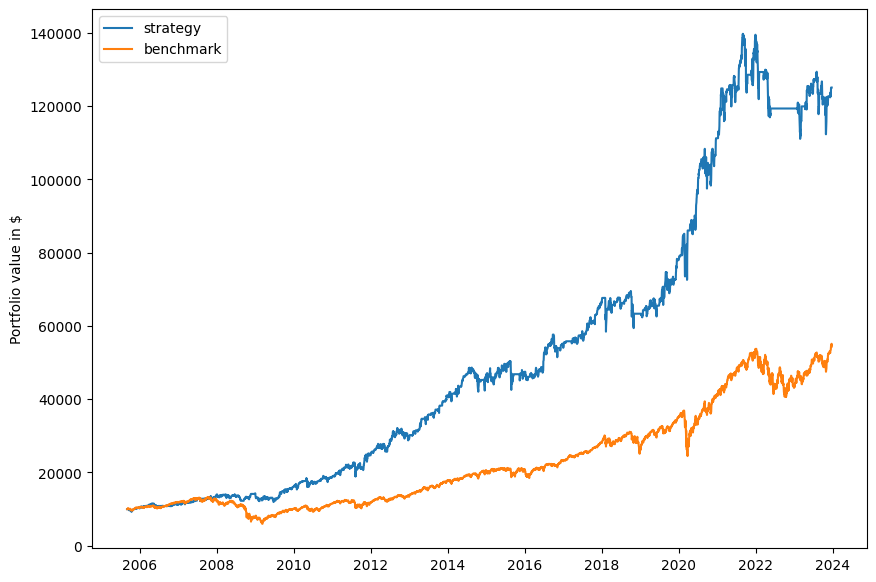

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,14.81,9.70
max_closed_out_drawdown,-20.53,-54.93
annualized_return_over_max_drawdown,0.72,0.18
best_month,20.91,23.38
worst_month,-14.77,-30.93
sharpe_ratio,0.88,0.57
sortino_ratio,0.95,0.70
monthly_std,3.81,4.62
annual_std,14.75,16.61


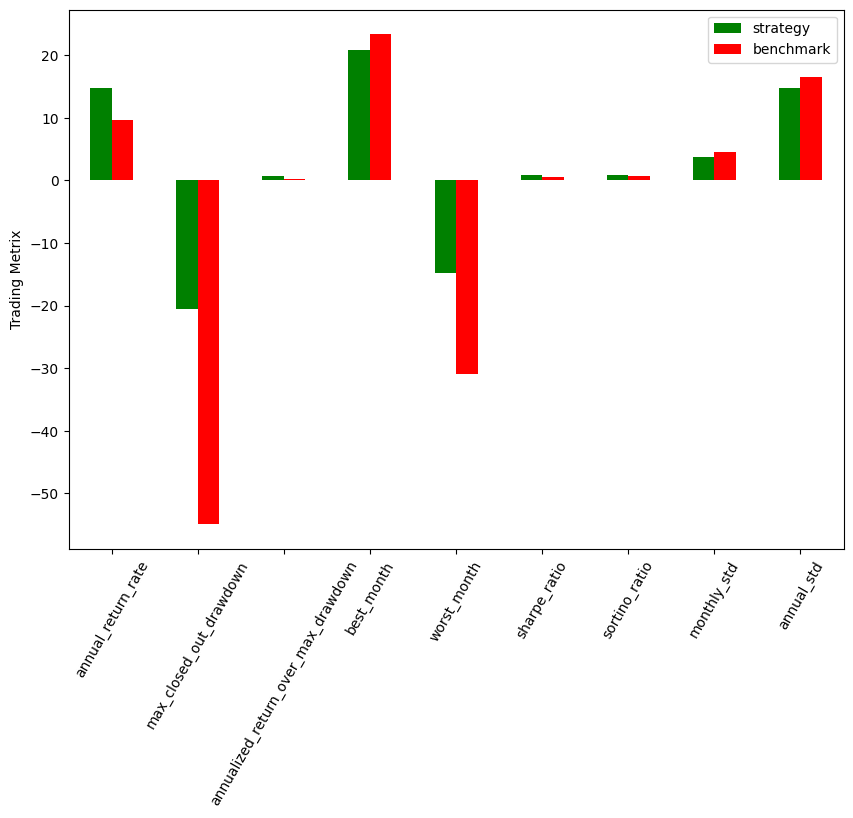

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.88
sharpe_ratio_max        0.93
sharpe_ratio_min        0.83
strategy risk           0.15
instrument risk         0.17
optimal target risk     0.88
half kelly criterion    0.44
aggressive leverage     5.28
moderate leverage       2.64
conservative leverage   2.48
dtype: float64